# Semi Structured Data 
## - Exploring Web Scraping, XML handling, and Accesing JSON with Web API

#### Gugan S Kathiresan (Course work - DS5110: Introduction to Data Management and Processing (Fall 2023))

### *Task 1 - Web Scraping with Beautiful Soup*

Write a Python program to download IMDB’s top 250 movies from https://www.imdb.com/
chart/top and load them into a DataFrame. For each movie show its title, director name,
list of actors, release year, and IMDB rating.
For example, the following table shows the data of the top 10 movies:
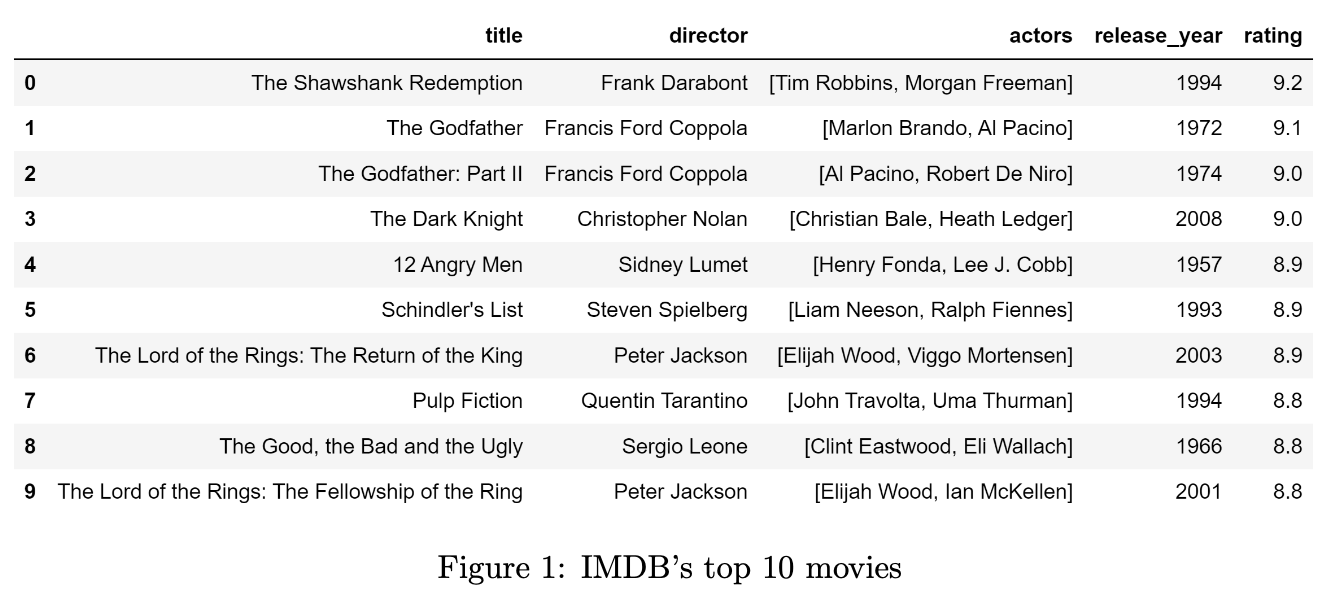

In [5]:
import requests as r
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL to be scraped
url = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc"
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}

def get_HTML(url, headers):
    # obtain the HTML status of the 
    request_status = r.get(url, headers=headers)
    return request_status

def read_Page(url, headers):
    page_text = (get_HTML(url, headers)).text
    movies_list = []
    soup = BeautifulSoup(page_text, "html.parser") # Using the beautiful soup library to parse html content
    list_element = soup.find('div', class_='lister-list') # Extracting the parent listing from the page
    
    for movie_item in list_element.find_all('div', class_='lister-item mode-advanced'):
        # Based on the Inspection of the page, the above and below lines are the consecutive parents in the 
        # hierarchy in order to obtain the relevant movie content of the list element.
        movie_content = movie_item.find('div', class_='lister-item-content')
        
        # Steps to obtain the title and year from the corresponding parent tag
        title_content = movie_content.find('h3', class_='lister-item-header')
        title = title_content.find('a').text
        
        year_content = movie_content.find('span', class_='lister-item-year text-muted unbold')
        release_year = year_content.text.split('(')[-1].split(')')[0]
        
        # Steps to obtain the rating from the corresponding parent tag
        rating_content = movie_content.find('div', class_='ratings-bar')
        rating = rating_content.find('strong').text        
        
        # Steps to obtain the director and actor names from the corresponding parent tag
        # the paragraph tag that we want has no class. So we need to use find all and get the right index
        name_content = movie_content.find_all('p')[2]
        director = name_content.find_all('a')[0].text
        actor_content = name_content.find_all('a')[1:]
        actors = []
        for a in actor_content:
            actors.append(a.text)
            
        # Appending all the content as a 2D List that can be put into a pandas dataframe later
        data_list = [title, director, actors, release_year, rating]
        movies_list.append(data_list)

    return movies_list
        
def get_IMDBdata(url, headers):
    values = read_Page(url, headers)
    dataframe = pd.DataFrame(values, columns = ["Title", "Director", "Actors", "Release Year", "Ratings"])
    return dataframe

movie_df = get_IMDBdata(url, headers)
movie_df.head(10)

,Title,Director,Actors,Release Year,Ratings
0,The Shawshank Redemption,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",1994,9.3
1,The Godfather,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1972,9.2
2,The Dark Knight,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2008,9.0
3,Schindler's List,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",1993,9.0
4,The Lord of the Rings: The Return of the King,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",2003,9.0
5,12 Angry Men,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",1957,9.0
6,The Godfather Part II,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",1974,9.0
7,Pulp Fiction,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",1994,8.9
8,Fight Club,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",1999,8.8
9,Inception,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2010,8.8


### *Task 2 - XML and XPath*

Download the file <recipes.xml> from the Github<br>
• The file contains a collection of recipes.<br>
• Recipes consist of ingredients, steps for preparation, possibly some comments, and a
specification of its nutrition.<br>
• An ingredient can be simple or composite.<br>
• A simple ingredient has a name, an amount (possibly unspecified), and a unit (unless
amount is dimensionless).<br>
• A composite ingredient is recursively a recipe with ingredients and preparation.<br>
1. Write a Python program to read the XML file and display a table with the title of each
recipe, the names of its ingredients, and the number of calories.
2. Write the following XPath queries:
(a) Find the titles of all recipes.
(b) Find the titles of recipes that use olive oil.
(c) Find the titles of all recipes with less than 500 calories.
(d) Find the amount of sugar needed for Zuppa Inglese.
(e) Find the titles of all recipes that require 4 steps.
(f) Find the names of all ingredients that are used to make other ingredients.
(g) Find the names of all ingredients for which you need other ingredients.
(h) Find the names of the first three ingredients in each recipe.
Note: To run XPath queries in Python, you can use the lxml package as demonstrated
below:
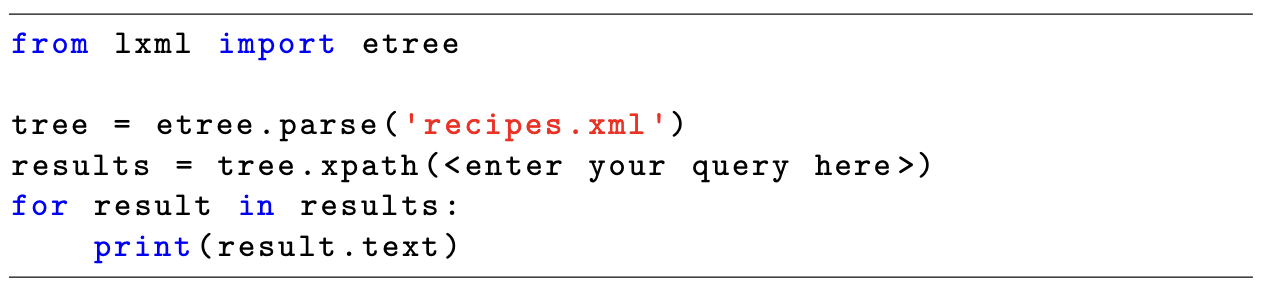


In [6]:
# 1. Write a Python program to read the XML file and display a table with the title of each
# recipe, the names of its ingredients, and the number of calories.
from lxml import etree

tree = etree.parse('recipes.xml')
# Extracting the recipe data only based on the tag structure found during inspection of xml file
recipes = tree.xpath('/collection/recipe')

values = []
# Iterate over each recipe
for recipe in recipes:

    # Steps to find the title tagged elements
    title = recipe.find("title").text

    # Steps to find calorie in the nutrition tagged elements 
    calories = recipe.find("nutrition").attrib["calories"]

    # Steps to find and save the list of ingredients.
    ingredients = []
    for ingredient in recipe.findall("ingredient"):
        # Appending each ingredient to a list. 
        ingredients.append(ingredient.attrib["name"])
    
    data_list = [title, ingredients, calories]

    values.append(data_list)

## Finally, printing the values to understand the overall data.
recipe_df = pd.DataFrame(values, columns = ["Title", "Ingredients", "Calories"])
recipe_df


,Title,Ingredients,Calories
0,Beef Parmesan with Garlic Angel Hair Pasta,"[beef cube steak, onion, sliced into thin ring...",1167
1,Ricotta Pie,"[filling, dough, milk]",349
2,Linguine Pescadoro,"[linguini pasta, sauce]",532
3,Zuppa Inglese,"[egg yolks, milk, Savoiardi biscuits, sugar, A...",612
4,Cailles en Sarcophages,"[pastry, filling, package phyllo dough, egg wh...",8892


In [7]:
# 2. Write the following XPath queries:
    
tree = etree.parse('recipes.xml')

# (a) Find the titles of all recipes.
query = '/collection/recipe'
results = tree.xpath(query)
print("a) Titles of all recipes: \n", [r.find("title").text for r in results], '\n')

# (b) Find the titles of recipes that use olive oil.
query = '/collection/recipe[ingredient[@name="olive oil"]]'
results = tree.xpath(query)
print("b) Titles of recipes that use olive oil: \n", [r.find("title").text for r in results], '\n')

# (c) Find the titles of all recipes with less than 500 calories.
query = '/collection/recipe[nutrition[@calories<500]]'
results = tree.xpath(query)
print("c) Titles of recipes with <500 cals: \n", [r.find("title").text for r in results], '\n')
    
# (d) Find the amount of sugar needed for Zuppa Inglese.
query = '/collection/recipe[title="Zuppa Inglese"]/ingredient[@name="sugar"]'
results = tree.xpath(query)
print("d) Sugar needed for Zuppa Inglese: \n", [r.attrib.get("amount") for r in results], '\n')

# (e) Find the titles of all recipes that require 4 steps.
query = '/collection/recipe[count(preparation/step)=4]'
results = tree.xpath(query)
print("e) Titles of recipes with 4 steps: \n", [r.find("title").text for r in results], '\n')

# (f) Find the names of all ingredients that are used to make other ingredients.
query = '/collection/recipe/ingredient[count(ingredient)>1]/ingredient'
results = tree.xpath(query)
print("f) Ingredients that can make other ingredients: \n", [r.attrib.get("name") for r in results], '\n')

# (g) Find the names of all ingredients for which you need other ingredients.
query = '/collection/recipe/ingredient[count(ingredient)>1]'
results = tree.xpath(query)
print("g) Ingredients that need other ingredients: \n", [r.attrib.get("name") for r in results], '\n')


# (h) Find the names of the first three ingredients in each recipe.
query = '/collection/recipe/ingredient[position() < 3]'
results = tree.xpath(query)
print("h) First three ingredients of each recipe: \n", [r.attrib.get("name") for r in results], '\n')

a) Titles of all recipes: 
 ['Beef Parmesan with Garlic Angel Hair Pasta', 'Ricotta Pie', 'Linguine Pescadoro', 'Zuppa Inglese', 'Cailles en Sarcophages'] 

b) Titles of recipes that use olive oil: 
 ['Beef Parmesan with Garlic Angel Hair Pasta'] 

c) Titles of recipes with <500 cals: 
 ['Ricotta Pie'] 

d) Sugar needed for Zuppa Inglese: 
 ['0.75'] 

e) Titles of recipes with 4 steps: 
 ['Beef Parmesan with Garlic Angel Hair Pasta', 'Ricotta Pie'] 

f) Ingredients that can make other ingredients: 
 ['ricotta cheese', 'eggs', 'white sugar', 'vanilla extract', 'semisweet chocolate chips', 'flour', 'baking powder', 'white sugar', 'shortening', 'eggs, lightly beaten', 'vanilla extract', 'olive oil', 'minced cloves of garlic', 'Italian seasoning', 'dried thyme', 'crushed red pepper flakes', 'crushed tomatoes', 'black olives, drained', 'whole baby clams', 'minced clams, with juice', 'small salad shrimp', 'scallops', 'lemon zest', 'salt', 'ground black pepper', 'chilled unsalted butter', 'fl

In [ ]:
# (d) Find the amount of sugar needed for Zuppa Inglese.
query = '/collection/recipe[title="Zuppa Inglese"]/ingredient[@name="sugar"]'
# (e) Find the titles of all recipes that require 4 steps.
query = '/collection/recipe[count(preparation/step)=4]'
# (f) Find the names of all ingredients that are used to make other ingredients.
query = '/collection/recipe/ingredient[count(ingredient)>1]/ingredient'

### *4 JSON and Web API*

The Open Directions API provides a free web service that returns JSON-formatted driving
directions between locations. Description of the service and its parameters can be found at
https://developer.mapquest.com/documentation/directions-api.
In order to use the service, you will first need to obtain a free API key from https:
//developer.mapquest.com. <br><br>
Write a Python program that gets from the user an origin and a destination location, and
displays the driving instructions to get from the origin to the destination. For each leg of the
route, show the driving instruction, distance and time.
For example, the following table shows the driving instructions from Northeastern to
Faneuil Hall Marketplace as obtained from the service:
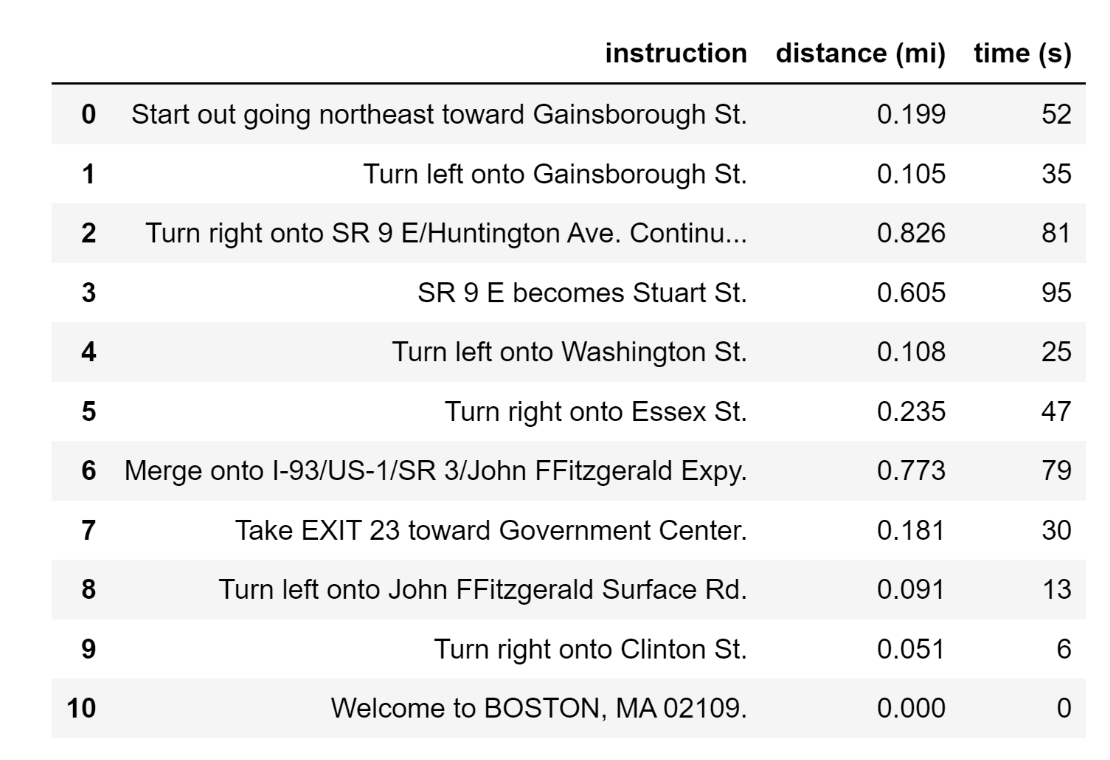
Figure 2: Driving instructions from Northeastern University to Faneuil Hall Marketplace


In [8]:
my_key = 'AyaQHTH9yQDjDKSEWKfYVJxLJB4093Xm'

# Function to handle the string inputs (created based on the experimentation on the website)
# For an input "Northeastern University" the function returns "Northeastern+University", i.e, replaces ' ' with '+'
def get_loc(loc):
    final_loc = ''
    for x in loc.split(' '):
        if x == loc.split(' ')[-1]:
            final_loc = final_loc + x
        else:
            final_loc = final_loc + x + '+'
    return final_loc

def directions(start, destination, key):
    # Handling the start and destination location strings
    start_loc = get_loc(start)
    dest_loc = get_loc(destination)
    
    # URL copied from the experiments done on the website source given in question
    url = f"https://www.mapquestapi.com/directions/v2/route?key={key}&from={start_loc}&to={dest_loc}&outFormat=json&ambiguities=ignore&routeType=fastest&doReverseGeocode=false&enhancedNarrative=false&avoidTimedConditions=false"
    result = requests.get(url).json()
    
    values = []
    
    for legs in result['route']['legs']: # Each section of the travel of the json is split into legs
        for man in legs['maneuvers']: # Maneuvers section provide the access to contents of the directions
            instruction = man["narrative"]
            distance = man["distance"]
            time = man["time"]
            data_values = [instruction, distance, time]
            values.append(data_values) # Appending to list to create a dataframe
    return pd.DataFrame(values, columns = ['instruction', 'distance (mi)', 'time (s)'])

map_df = directions("Northeastern University, Boston", "Faneuil Hall Marketplace",  my_key)
map_df        

,instruction,distance (mi),time (s)
0,Head toward Gainsborough St on Huntington Ave ...,0.1584,31
1,Keep right onto Huntington Ave (RT-9 E). Go fo...,0.0926,40
2,Turn left onto Massachusetts Ave toward Cambri...,0.0628,27
3,Turn slightly left onto Westland Ave. Go for 0...,0.2759,87
4,Continue on Fenway. Go for 0.1 mi.,0.1442,22
5,Take ramp onto Storrow Dr toward Newton/Downto...,1.1980,183
6,Keep left onto Storrow Dr. Go for 0.4 mi.,0.4374,56
7,Keep left onto Storrow Dr (RT-28 N) toward I-9...,0.3461,43
8,Keep right onto Storrow Dr (RT-28 N) toward Lo...,0.1603,78
9,Turn right and take ramp onto I-93 S toward Qu...,0.7357,113
